# Fetch dataset

In [2]:
import boto3

In [8]:
dynamodb = boto3.resource('dynamodb')

In [9]:
table = dynamodb.Table('car_table')

In [10]:
response = table.scan()
data = response['Items']

while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [12]:
len(data)

1728

# Dataset formatting

In [62]:
from numpy import array
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [64]:
rawDataset = array([list(d.values())[1:] for d in data])

In [65]:
enc = OrdinalEncoder()
enc.fit(rawDataset)

OrdinalEncoder()

In [67]:
dataset = enc.transform(rawDataset)

In [91]:
dataset[1]

array([2., 0., 0., 0., 2., 2., 2.])

In [81]:
attributes = list(data[0].keys())[1:]

In [92]:
features = attributes[:5] + attributes[6 :]
X = dataset[:,[0,1,2,3,4,6]]
y = dataset[:,5]

In [93]:
features

['buying', 'maint', 'safety', 'lug_boot', 'persons', 'doors']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model fit

In [133]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import graphviz 

In [ ]:
pydot_graph = pydotplus.graph_from_dot_data(dot_data)

In [109]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [110]:
clf = clf.fit(X_train, y_train)

In [132]:
clf.score(X_test, y_test)

0.9855491329479769

In [134]:
scores = cross_val_score(clf, X, y, cv=5)

In [135]:
scores

array([0.96242775, 0.97687861, 0.97976879, 0.98550725, 0.9884058 ])

# Model visualization

In [129]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,
                     class_names='class',
                     filled=True, rounded=True,  
                     special_characters=True)  

In [130]:
graph = graphviz.Source(dot_data)

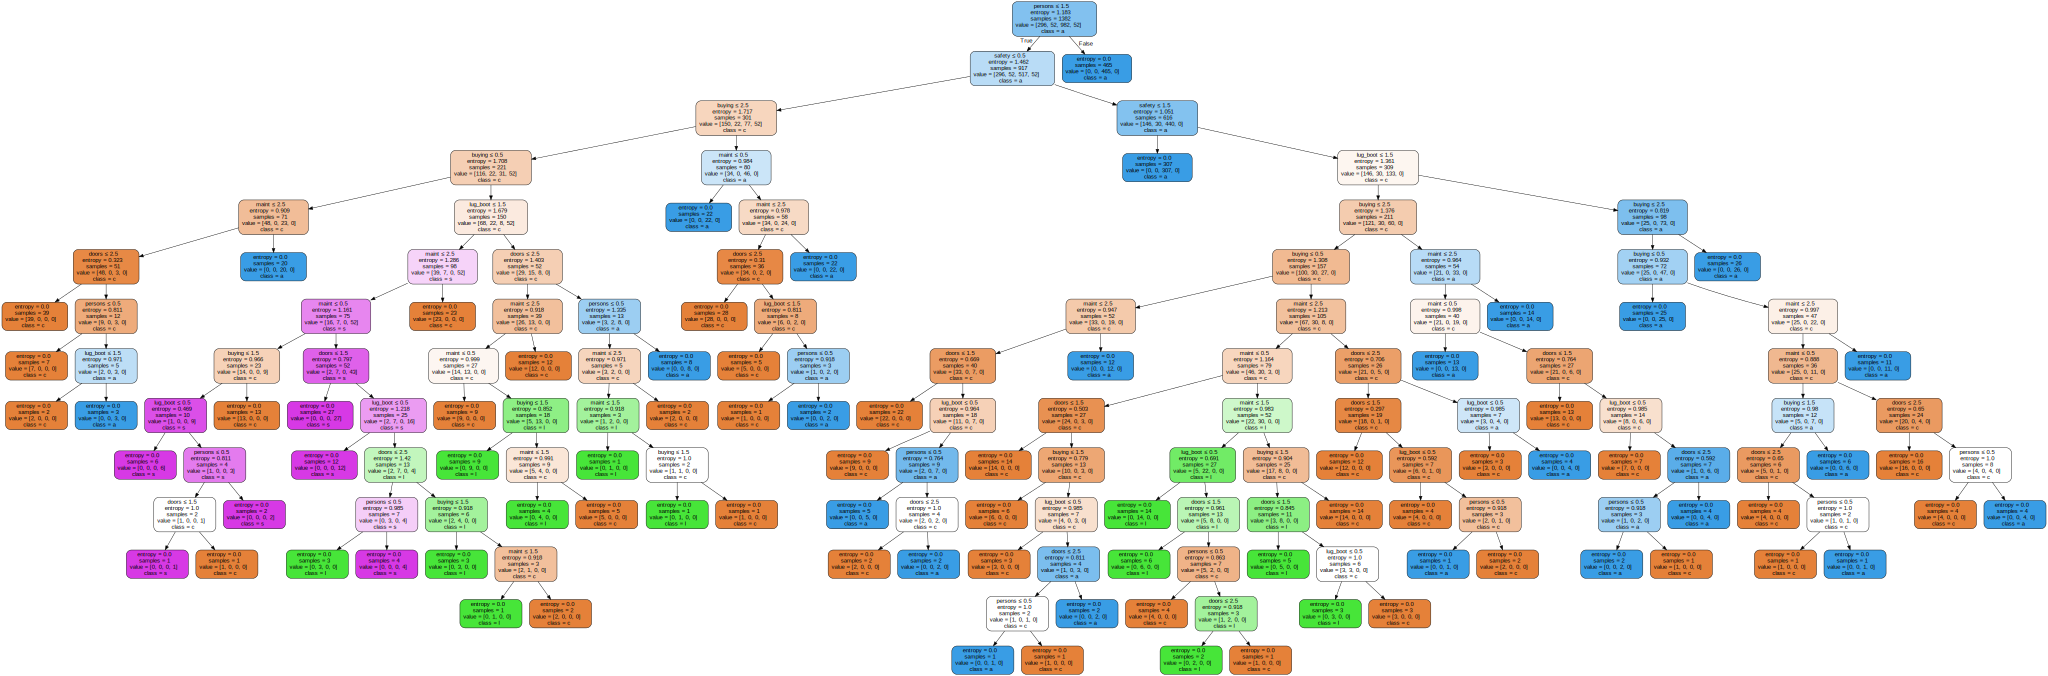

In [131]:
graph